## Create a dataset
This is notebook to explore the process of making a dataset - this is however just stiched together and should be done much nicer


In [149]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from torchvision import transforms

### Download a video to use

In [1]:
# from pytube import YouTube
# url = "https://www.youtube.com/watch?v=0V0HQDwM22E"
# output_path = "videos/highlights.mp4"
# file_name = "rallies1.mp4"

# yt = YouTube(url)
# yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download(output_path=output_path, filename=file_name)

### Load video / images

In [150]:
MAX_FRAMES = 100_000

cap = cv2.VideoCapture('../data/raw/videos/rallies1.mp4')
frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

n_frames = min(MAX_FRAMES, frame_num)
print(f"num frames: {n_frames}, at {frame_width}x{frame_height}")

num frames: 19967, at 1280x720


### Load keypoints

In [151]:
import json
f = open("../data/raw/videos/keypoints.json")
coco = json.load(f)
f.close()

print(coco.keys())
print(coco['annotations'][0])

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])
{'id': 1, 'image_id': 11, 'category_id': 1, 'segmentation': [], 'area': 340725.36140000005, 'bbox': [180.8, 149.12, 914.11, 372.74], 'iscrowd': 0, 'attributes': {'occluded': False, 'keyframe': False}, 'keypoints': [180.8, 521.03, 2, 1094.91, 521.86, 2, 850.75, 149.96, 2, 428.12, 149.12, 2, 297.99, 519.37, 2, 978.02, 520.29, 2, 798.2, 150.6, 2, 480.69, 149.61, 2, 371.13, 373.82, 2, 640.42, 373.46, 2, 905.42, 373.9, 2, 819.03, 194.99, 2, 640.15, 196.19, 2, 459.01, 194.71, 2, 640.16, 266.15, 2], 'num_keypoints': 15}


In [152]:
df_data = []
image_names = []
image_ids = []

for annotation in coco['annotations']:
    id = annotation['image_id']

    image_name = f"image_{id}.npy"
    image_names.append(image_name)
    image_ids.append(id)

    keypoints = np.array(annotation['keypoints']).reshape(-1,3)[:,:2].flatten()
    df_data.append(keypoints)

kp_names = [f'point_{n}_{xy}' for n in range(15) for xy in ["x","y"]]

df = pd.DataFrame(df_data, columns=kp_names, index=None)
df.insert(0, "image_name", image_names)
df.insert(0, "image_id", image_ids)
df

,image_id,image_name,point_0_x,point_0_y,point_1_x,point_1_y,point_2_x,point_2_y,point_3_x,point_3_y,...,point_10_x,point_10_y,point_11_x,point_11_y,point_12_x,point_12_y,point_13_x,point_13_y,point_14_x,point_14_y
0,11,image_11.npy,180.80,521.03,1094.91,521.86,850.75,149.96,428.12,149.12,...,905.42,373.90,819.03,194.99,640.15,196.19,459.01,194.71,640.16,266.15
1,20,image_20.npy,180.93,520.48,1095.23,521.32,850.24,149.68,427.25,148.82,...,905.34,373.61,818.98,194.58,639.70,195.58,458.17,194.58,640.35,266.11
2,30,image_30.npy,180.86,520.17,1095.17,521.01,850.18,149.37,427.18,148.51,...,905.27,373.30,818.92,194.27,639.63,195.26,458.10,194.27,640.80,266.31
3,40,image_40.npy,180.86,519.65,1095.17,520.49,850.18,148.85,427.18,147.99,...,905.27,372.78,818.92,193.75,639.63,194.75,458.10,193.75,640.80,265.80
4,50,image_50.npy,180.35,520.68,1094.65,521.53,849.66,149.89,426.67,149.02,...,904.76,373.81,818.40,194.79,639.12,195.78,457.59,194.78,640.28,266.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,8813,image_8813.npy,195.10,530.81,1079.94,528.96,860.90,165.90,417.77,166.48,...,906.74,392.94,826.13,213.38,639.20,214.28,452.55,213.88,639.06,287.52
430,8823,image_8823.npy,195.10,530.81,1079.94,528.96,860.90,165.90,417.77,166.48,...,906.74,392.94,826.13,213.38,639.20,214.28,452.55,213.88,639.06,287.52
431,8833,image_8833.npy,195.10,530.81,1079.94,528.96,860.90,165.90,417.77,166.48,...,906.74,392.94,826.13,213.38,639.20,214.28,452.55,213.88,639.06,287.52
432,8843,image_8843.npy,195.10,530.81,1079.94,528.96,860.90,165.90,417.77,166.48,...,906.74,392.94,826.13,213.38,639.20,214.28,452.55,213.88,639.06,287.52


# Save
### Images

In [133]:
annotated_image_idx = set([anno['image_id'] for anno in coco['annotations']])
print(annotated_image_idx)

frame_num = 0
ret = True

while (ret and frame_num < n_frames):
    ret, im = cap.read()
    if frame_num in annotated_image_idx:
        image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB).astype(np.float32)
        np.save(f"../data/processed/images/image_{frame_num}.npy", image)

    frame_num += 1

{4101, 11, 2061, 4111, 20, 2071, 4121, 30, 2081, 4131, 40, 8233, 2091, 4141, 50, 8243, 2101, 4151, 60, 8253, 2111, 4161, 70, 8263, 2121, 4171, 80, 8273, 2131, 4181, 90, 8283, 2141, 4191, 100, 8293, 2151, 4201, 110, 8303, 2161, 4211, 120, 8313, 2171, 4221, 130, 8323, 2181, 4231, 140, 8333, 2191, 4241, 150, 8343, 2201, 4251, 160, 8353, 2211, 4261, 170, 8363, 2221, 4271, 180, 8373, 2231, 4281, 190, 8383, 2241, 4291, 200, 2251, 4301, 210, 2261, 4311, 220, 2271, 4321, 230, 2281, 4331, 240, 2291, 4341, 250, 2301, 4351, 260, 2311, 4361, 270, 2321, 4371, 280, 2331, 4381, 290, 2341, 4391, 300, 2351, 4401, 310, 2361, 4411, 320, 2371, 4421, 330, 2381, 4431, 340, 2391, 4441, 350, 2401, 4451, 360, 2411, 4461, 370, 2421, 4471, 380, 2431, 4481, 390, 2441, 4491, 400, 2451, 4501, 410, 2461, 4511, 420, 2471, 4521, 430, 8623, 2481, 4531, 440, 8633, 2491, 4541, 450, 8643, 2501, 4551, 460, 8653, 2511, 4561, 470, 8663, 2521, 4571, 480, 8673, 2531, 4581, 490, 8683, 2541, 4591, 500, 8693, 2551, 4601, 510, 870

### Labels/keypoints - as csv, not used

In [134]:
df.to_csv("../data/processed/keypoints.csv", header=True, index=False)

### Labels - as images

In [153]:
def gaussian_kernel(size, sigma2):
    """Generates a Gaussian kernel. Centered at 0,0"""
    x = np.arange(-size//2 + 1., size//2 + 1.)
    x = (1.0 / (2 * np.pi * sigma2)) * np.exp(-(((x - 0)** 2 + (x - 0)**2) / (2 * sigma2))) * (2 * np.pi * sigma2)
    kernel = np.outer(x, x)
    return kernel * 255

In [154]:
for annotation in coco['annotations']:
    id = annotation['image_id']
    keypoints = np.array(annotation['keypoints']).reshape(-1,3)[:,:2]

    im = np.zeros((frame_height, frame_width), dtype=np.float32)

    radius = 5
    sigma2 = 10 # squared sigma

    for cx, cy in keypoints:
        cx = int(cx)
        cy = int(cy)
        gaussian = gaussian_kernel(2 * radius, sigma2)

        im[cy-radius:cy+radius, cx-radius:cx+radius] = gaussian
        # break # save only one point for testing

    np.save(f"../data/processed/labels/image_{id}.npy", im)

# Test the dataset model

In [2]:
from tennis_court_tracker.data.TennisCourtDataset import TennisCourtDataset, ToTensor, Rescale, RandomCrop

In [6]:
court_dataset = TennisCourtDataset(
    "../data/processed/keypoints/keypoints.csv", 
    "../data/processed/images/",
    transform = transforms.Compose([
        Rescale((360, 640)),
    #     # RandomCrop(224),
        # ToTensor()
    ])
)

In [7]:
def show_keypoints(ax, image, keypoints):
    ax.imshow(image)
    ax.scatter(keypoints[:,0], keypoints[:,1], linewidth=0.25, marker=".", c="red")

In [8]:
fig = plt.figure()

for i, sample in enumerate(court_dataset):
    print(i, sample['image'].shape, sample['keypoints'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_keypoints(ax, **sample)

    if i == 3:
        plt.show()
        break

0 torch.Size([3, 360, 640]) torch.Size([15, 2])


<Figure size 640x480 with 0 Axes>

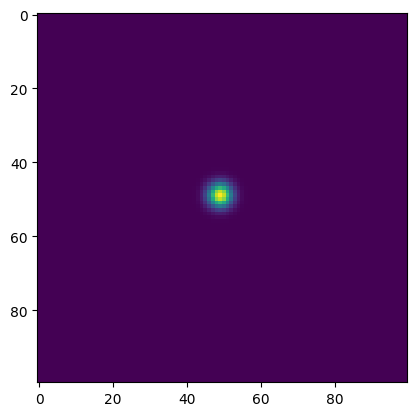

In [148]:
radius = 50
sigma2 = 10 # squared sigma

plt.imshow(gaussian_kernel(2*radius,10))
plt.colorbar()